In [5]:
import torch 
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from hydra import compose, initialize
from hydra.utils import instantiate
from omegaconf import OmegaConf
import seaborn as sns

plt.style.use("science")


In [59]:
runs_dir = Path.cwd() / "../lightning_logs/"
save_dir = Path.cwd() / "outputs/"


if not (save_dir / "figures").exists():
    (save_dir / "figures").mkdir(parents=True)
    
#set torch seed and numpy seed
rand_gen = torch.Generator()
rand_gen.manual_seed(0)




In [50]:
def ordering(name):
    if name == "train":
        return 0
    elif name == "freq":
        return 1
    elif name == "time":
        return 2
    else:
        return 3
    
LEGEND_MAPPING = {"train": "Training samples", "freq": "Generated samples (Frequency domain model)", "time": "Generated samples (Time domain model)"}
    
def plot_samples(samples_dic, n_samples):
    n_columns = len(samples_dic.keys()) 
    #Plot samples 
    fig, ax = plt.subplots(n_samples, n_columns, figsize = (5*n_samples, 10*n_columns))
    for k in range(n_samples):
        for i, (domain, samples) in enumerate(sorted(samples_dic.items(), key = lambda x: ordering(x[0]))):
            for j in range(samples.shape[-1]):
                ax[k, i].plot(samples[k, :, j], label=f"Feature {j}")
            ax[k, i].legend(fontsize=15)
            ax[0, i].set_title(LEGEND_MAPPING[domain], fontsize=25)
            
    return fig, ax
    
def heatmap_samples(samples_dic, n_samples):
    n_columns = len(samples_dic.keys()) 
    #Plot samples 
    fig, ax = plt.subplots(n_samples, n_columns, figsize = (5*n_samples, 5*n_columns))
    for k in range(n_samples):
        for i, (domain, samples) in enumerate(sorted(samples_dic.items(), key = lambda x: ordering(x[0]))):            
            max_val = torch.abs(samples[k]).max(dim=0)[0].max(dim=0)[0]
            min_val = torch.abs(samples[k]).min(dim=0)[0].min(dim=0)[0]
            sns.heatmap(samples[k].transpose(1, 0), cmap="RdBu_r", vmin=min_val, vmax=max_val, ax = ax[k, i])
            ax[0, i].set_title(LEGEND_MAPPING[domain])
    return fig, ax
    
    
def get_train_samples(model_id):
    
    with initialize(version_base=None, config_path="../lightning_logs/"+model_id):
        train_config = compose(config_name="train_config")
    train_config.datamodule.data_dir = Path.cwd() / "../data"
    datamodule = instantiate(train_config.datamodule)
    datamodule.prepare_data()
    datamodule.setup("plot")
    train_samples = datamodule.X_train
    return train_samples

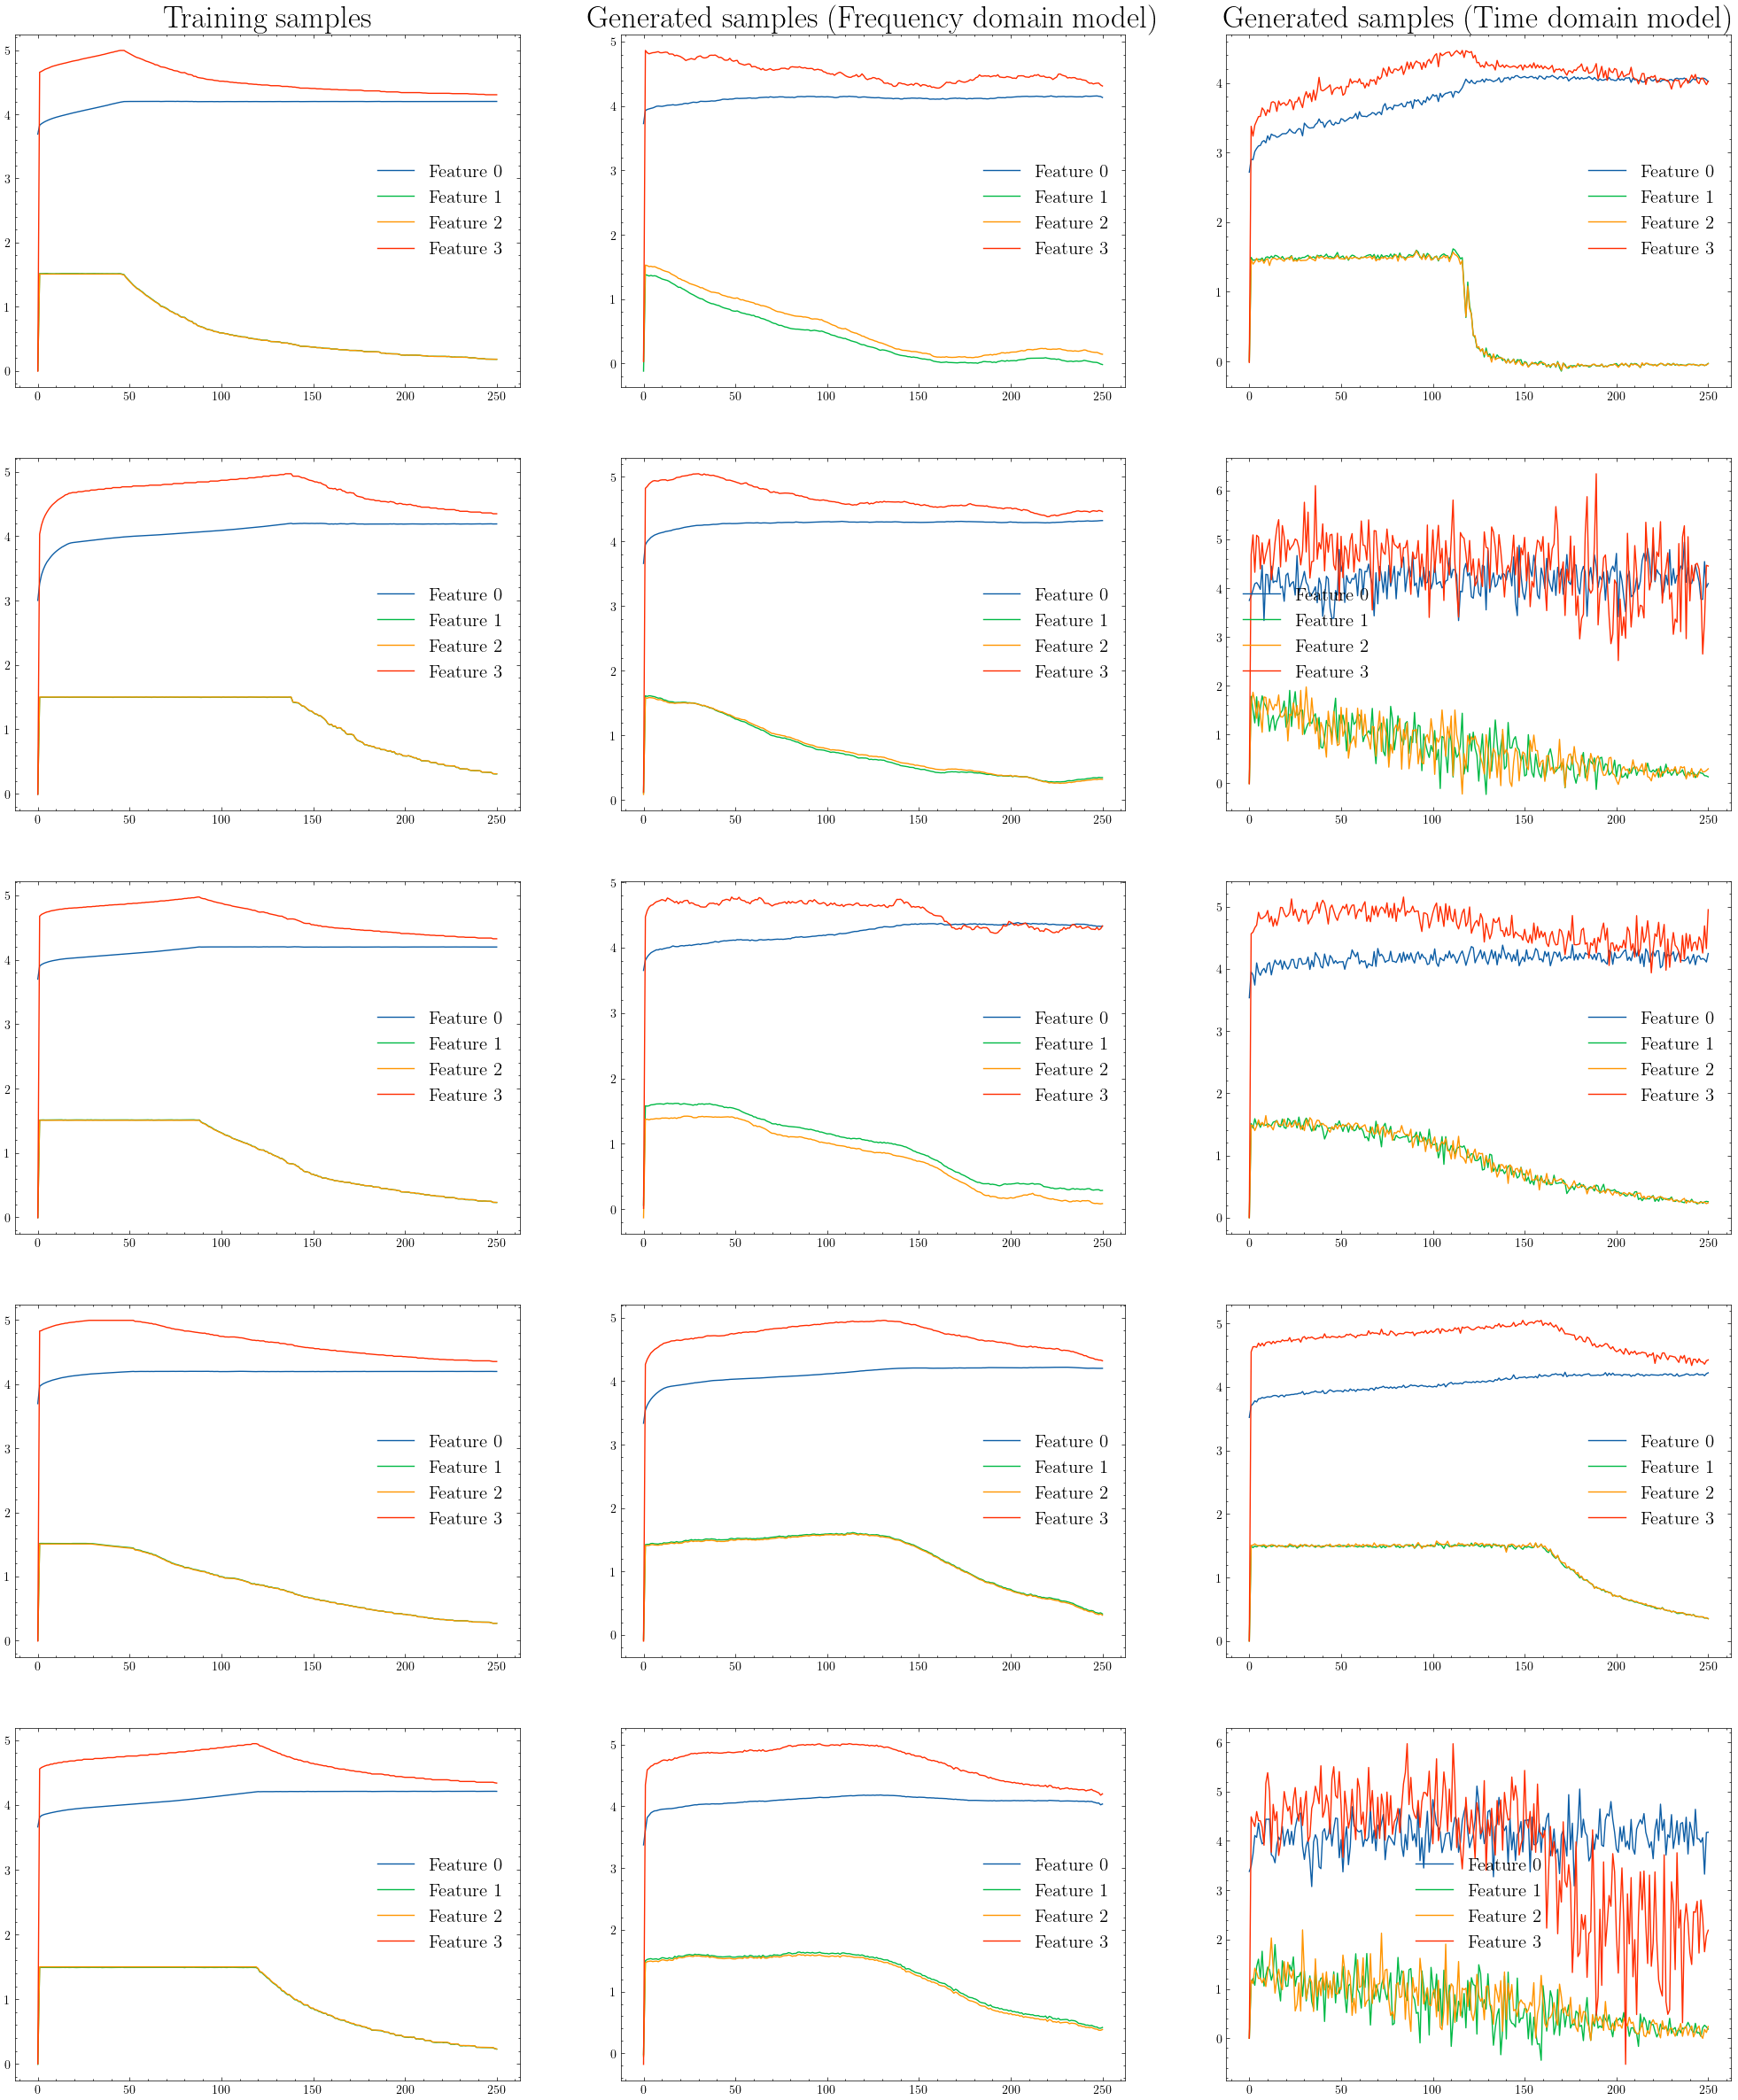

In [60]:
# Plot samples for the NASA charge dataset
model_ids = {"freq": "20d9c1kc", "time": "tip2g8eh"}
samples_dic = {}
n_samples = 5

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    samples_dic[domain] = torch.load(path_samples)
    #shuffle
    samples_dic[domain] = samples_dic[domain][torch.randperm(samples_dic[domain].shape[0], generator=rand_gen)]
    

train_samples = get_train_samples(model_ids["freq"])
samples_dic["train"] = train_samples

#shuffle
samples_dic["train"] = samples_dic["train"][torch.randperm(samples_dic["train"].shape[0], generator=rand_gen)]

fig, ax = plot_samples(samples_dic, n_samples)
fig.savefig(save_dir / "figures" / "nasa_charge_samples.pdf", bbox_inches="tight")
plt.show()


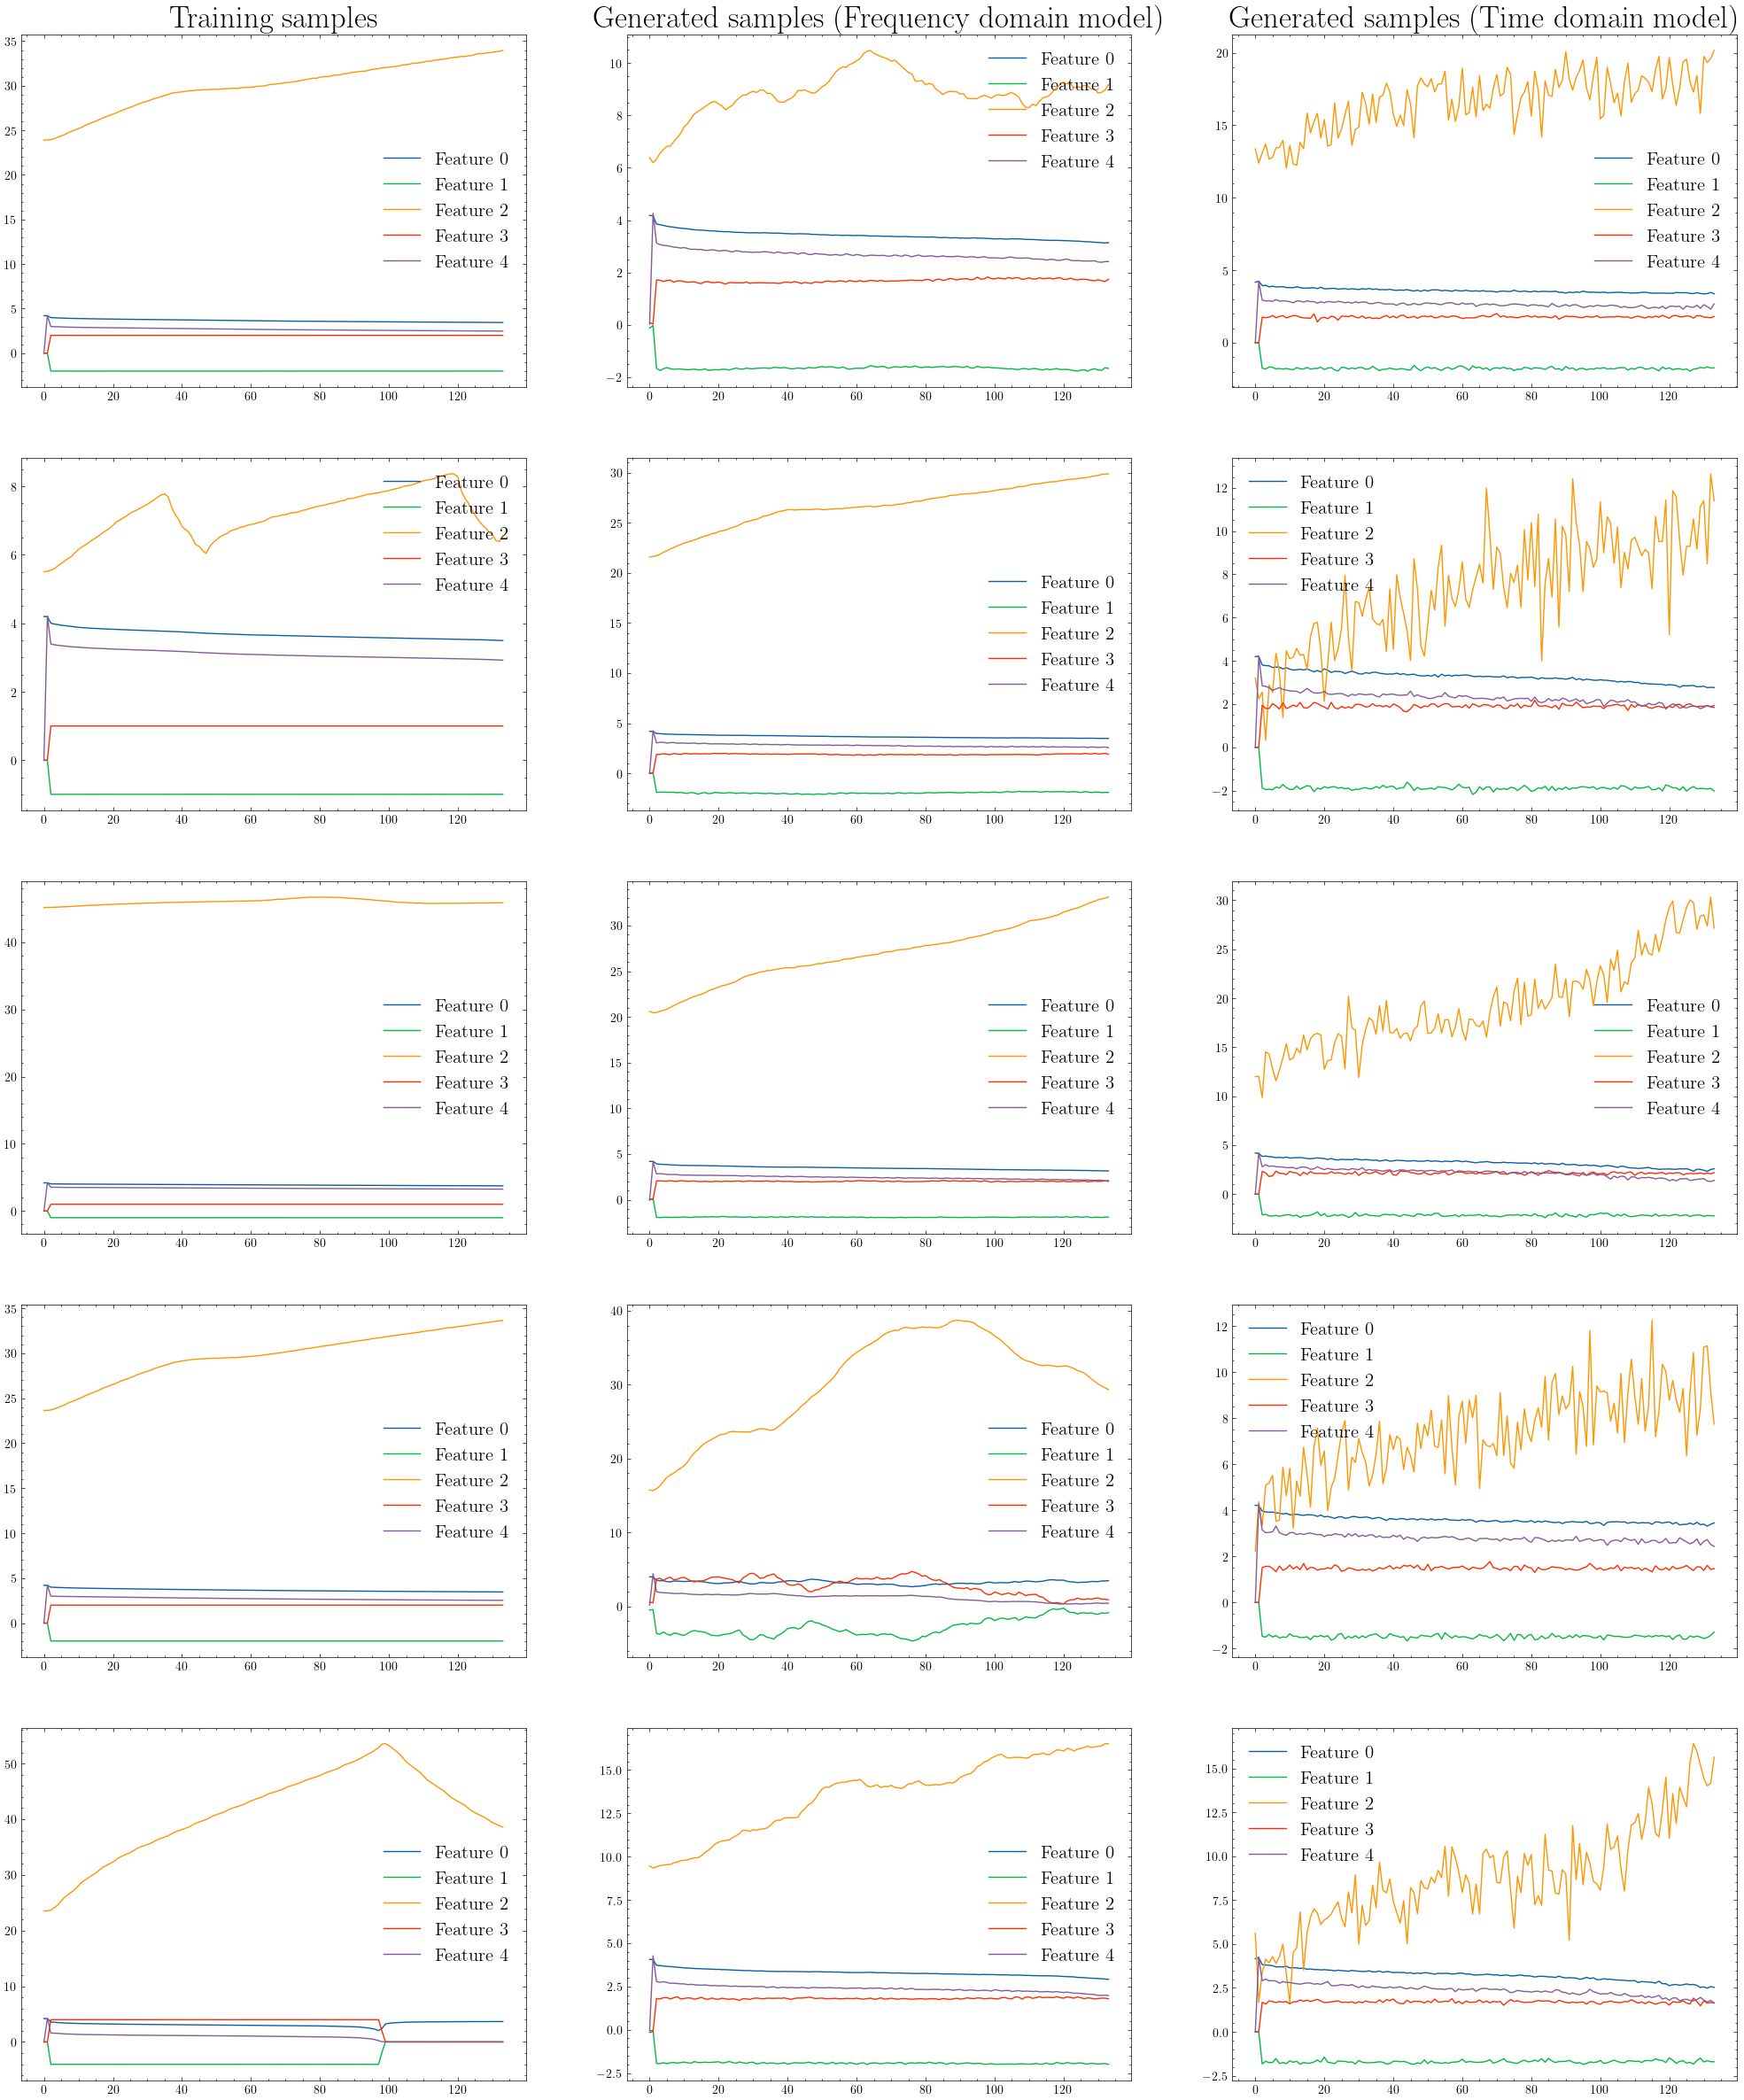

In [61]:
# Plot samples for the NASA discharge dataset
model_ids = {"freq": "qdzk36m7", "time": "hxoxvper"}
samples_dic = {}
n_samples = 5

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    samples_dic[domain] = torch.load(path_samples)
    #shuffle samples
    samples_dic[domain] = samples_dic[domain][torch.randperm(samples_dic[domain].shape[0], generator=rand_gen)]

train_samples = get_train_samples(model_ids["freq"])
samples_dic["train"] = train_samples
#shuffle
samples_dic["train"] = samples_dic["train"][torch.randperm(samples_dic["train"].shape[0], generator=rand_gen)]

fig, ax = plot_samples(samples_dic, n_samples)
#heatmap_samples(samples_dic, n_samples)
fig.savefig(save_dir / "figures" / "nasa_discharge_samples.pdf", bbox_inches="tight")
plt.show()

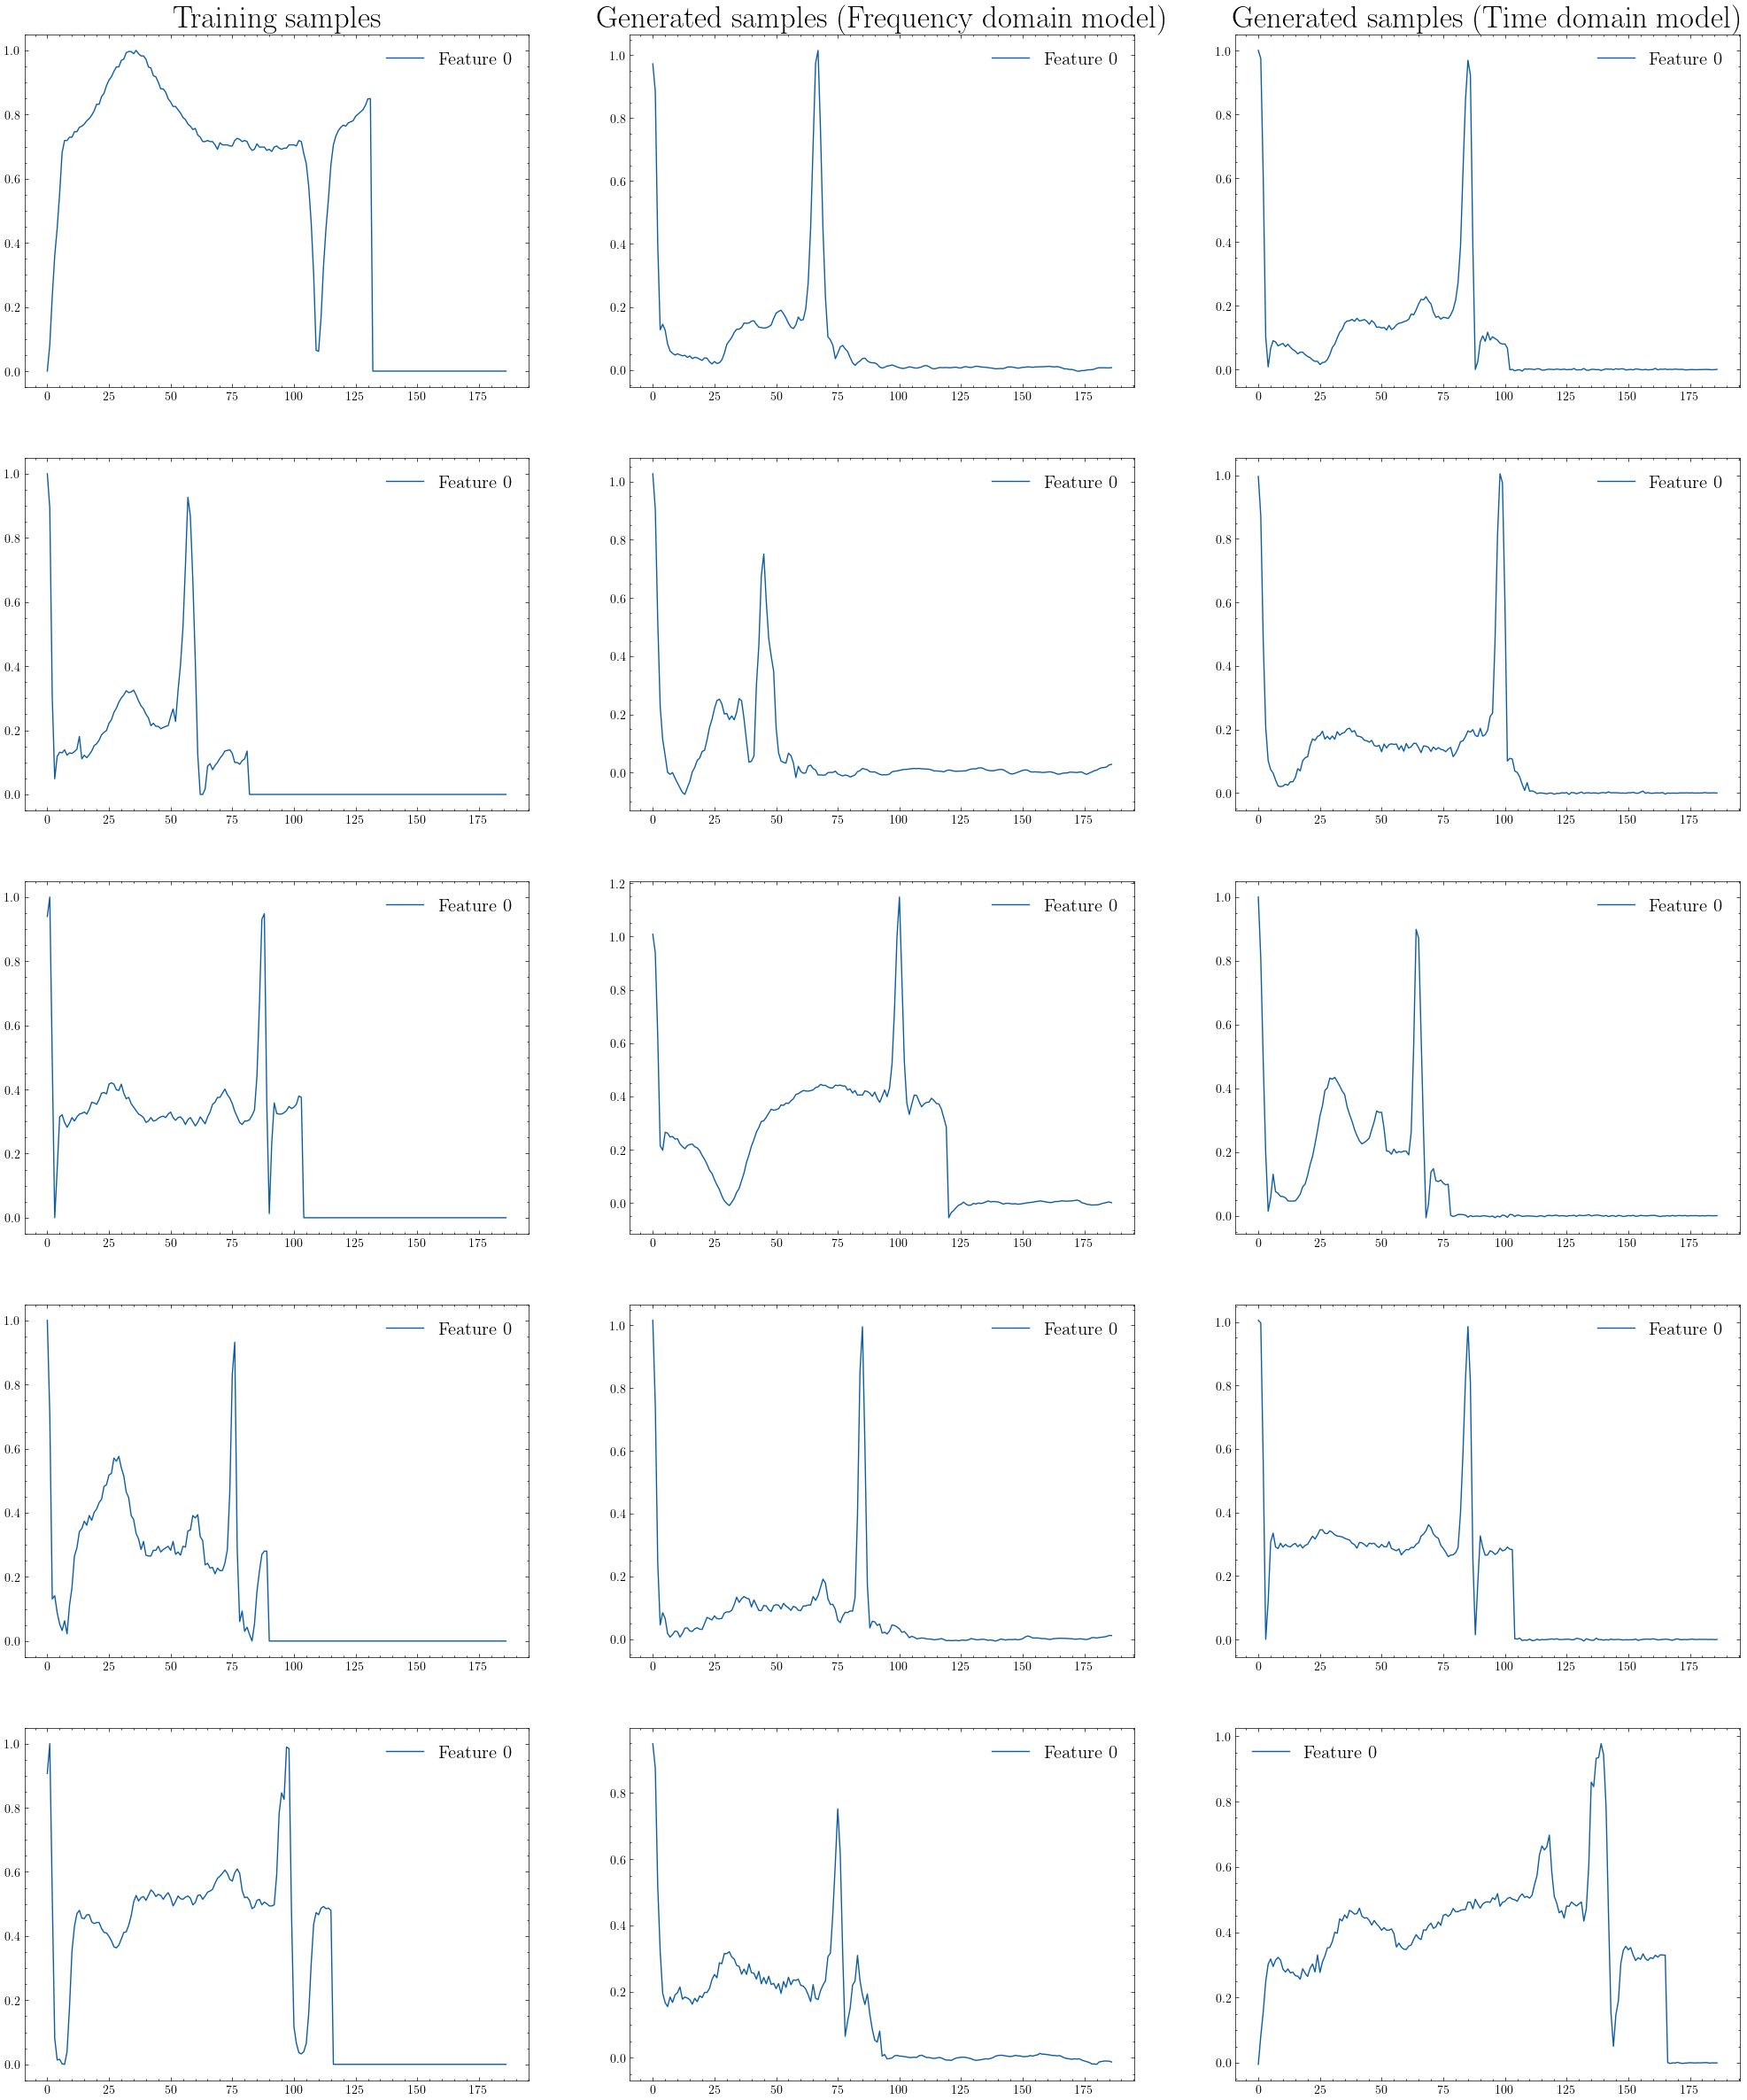

In [62]:
# Plot samples for the ECG discharge dataset
model_ids = {"freq": "emk7nyz3" , "time": "bf3lrfx9"}
n_samples = 5
samples_dic = {}

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    samples_dic[domain] = torch.load(path_samples)
    
    #Shuffle
    samples_dic[domain] = samples_dic[domain][torch.randperm(samples_dic[domain].shape[0], generator=rand_gen)]

train_samples = get_train_samples(model_ids["freq"])
samples_dic["train"] = train_samples
#shuffle
samples_dic["train"] = samples_dic["train"][torch.randperm(samples_dic["train"].shape[0], generator=rand_gen)]
fig, ax = plot_samples(samples_dic, n_samples)
fig.savefig(save_dir / "figures" / "ECG_samples.pdf", bbox_inches="tight")
plt.show()

In [63]:
#mimic 
model_ids = {"freq": "wdwxc4fg", "time": "amxdfaoo"}
n_samples = 5
samples_dic = {}

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    samples_dic[domain] = torch.load(path_samples)
    #shuffle
    samples_dic[domain] = samples_dic[domain][torch.randperm(samples_dic[domain].shape[0], generator=rand_gen)]

train_samples = get_train_samples(model_ids["freq"])
samples_dic["train"] = train_samples
#shuffle
samples_dic["train"] = samples_dic["train"][torch.randperm(samples_dic["train"].shape[0], generator=rand_gen)]

fig, ax  = heatmap_samples(samples_dic, n_samples)
fig.savefig(save_dir / "figures" / "mimic_samples.pdf", bbox_inches="tight")
plt.show()

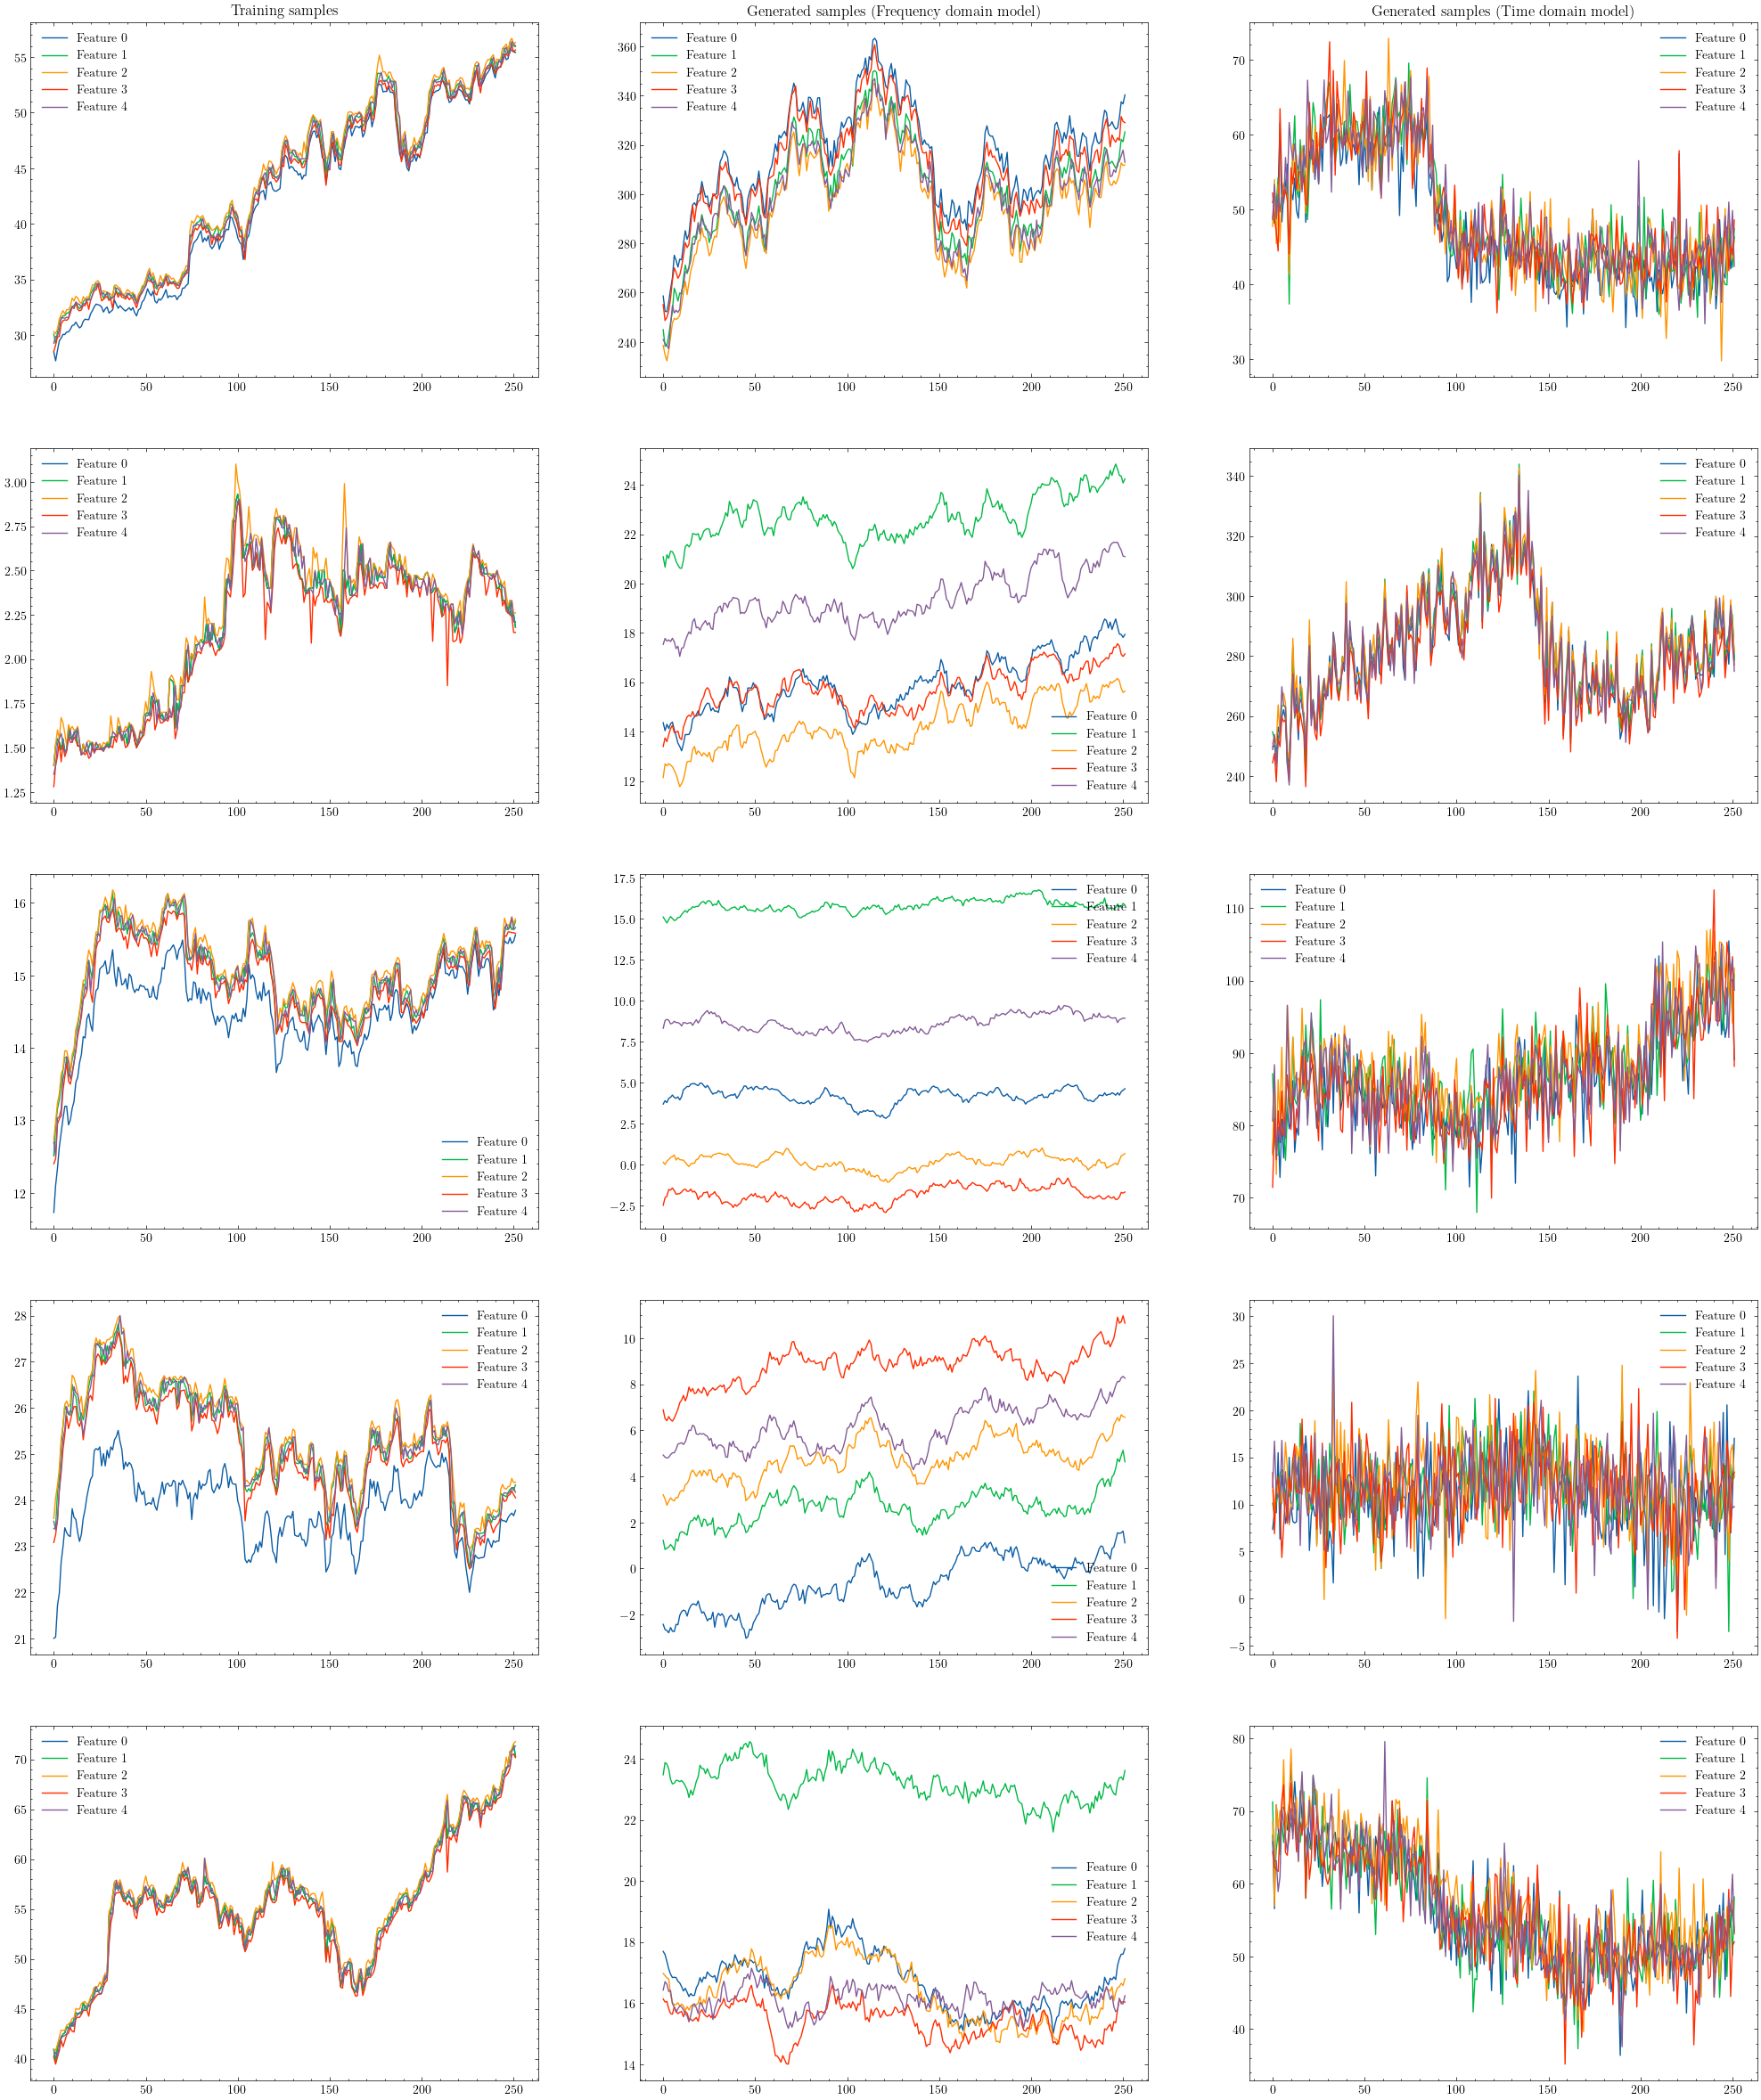

In [42]:
#Nasdaq 
model_ids = {"freq": "xxqse6xu", "time": "na9xdfui"}
samples_dic = {}
n_samples = 5

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    samples_dic[domain] = torch.load(path_samples)
    #shuffle
    samples_dic[domain] = samples_dic[domain][torch.randperm(samples_dic[domain].shape[0], generator=rand_gen)]
    
    

train_samples = get_train_samples(model_ids["freq"])

samples_dic["train"] = train_samples
samples_dic["train"] = samples_dic["train"][torch.randperm(samples_dic["train"].shape[0], generator=rand_gen)]

fig, ax = plot_samples(samples_dic, n_samples)
fig.savefig(save_dir / "figures" / "nasdaq_samples.pdf", dpi=300, bbox_inches="tight", format='pdf')
plt.show()

In [26]:
from fdiff.sampling.metrics import SlicedWasserstein

for feature in range(5):
    metric_computer = SlicedWasserstein(original_samples=train_samples[:,:, feature], random_seed=42, num_directions=1000)
    results_freq = metric_computer(samples_dic["freq"][:,:, feature])
    results_time = metric_computer(samples_dic["time"][:,:, feature])
    print(f"Feature {feature}: {results_freq['sliced_wasserstein_mean']} (freq) vs {results_time['sliced_wasserstein_mean']} (time)")

Feature 0: 44.326557062645236 (freq) vs 62.431029239380486 (time)


Feature 1: 44.646440708501764 (freq) vs 62.426983476472614 (time)


Feature 2: 45.74470499704323 (freq) vs 63.100278242143176 (time)


Feature 3: 43.80100310270081 (freq) vs 61.79322636070869 (time)


                                                                                  87proj/s]

Feature 4: 44.73755188938173 (freq) vs 62.34600761571284 (time)


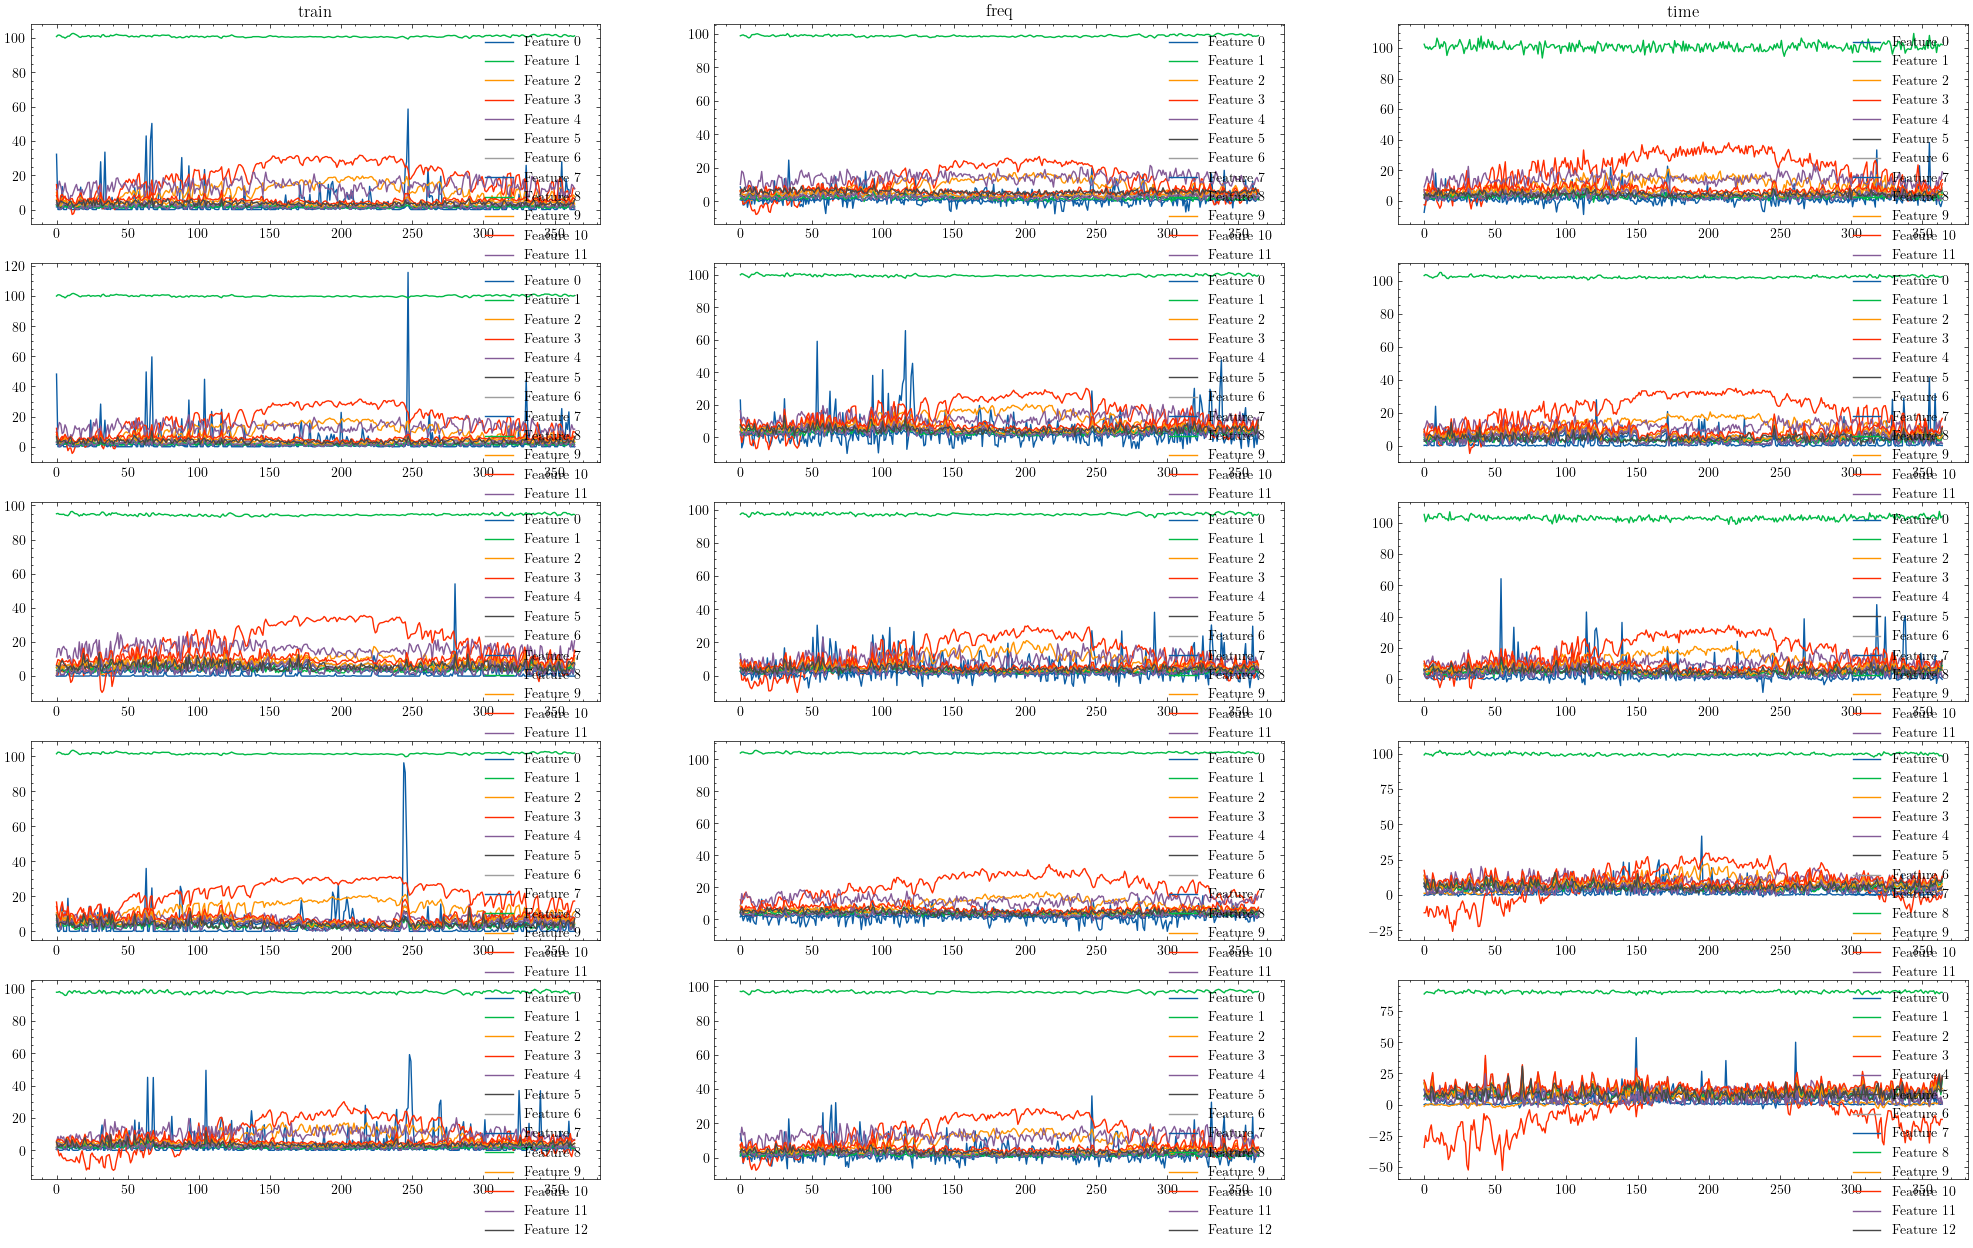

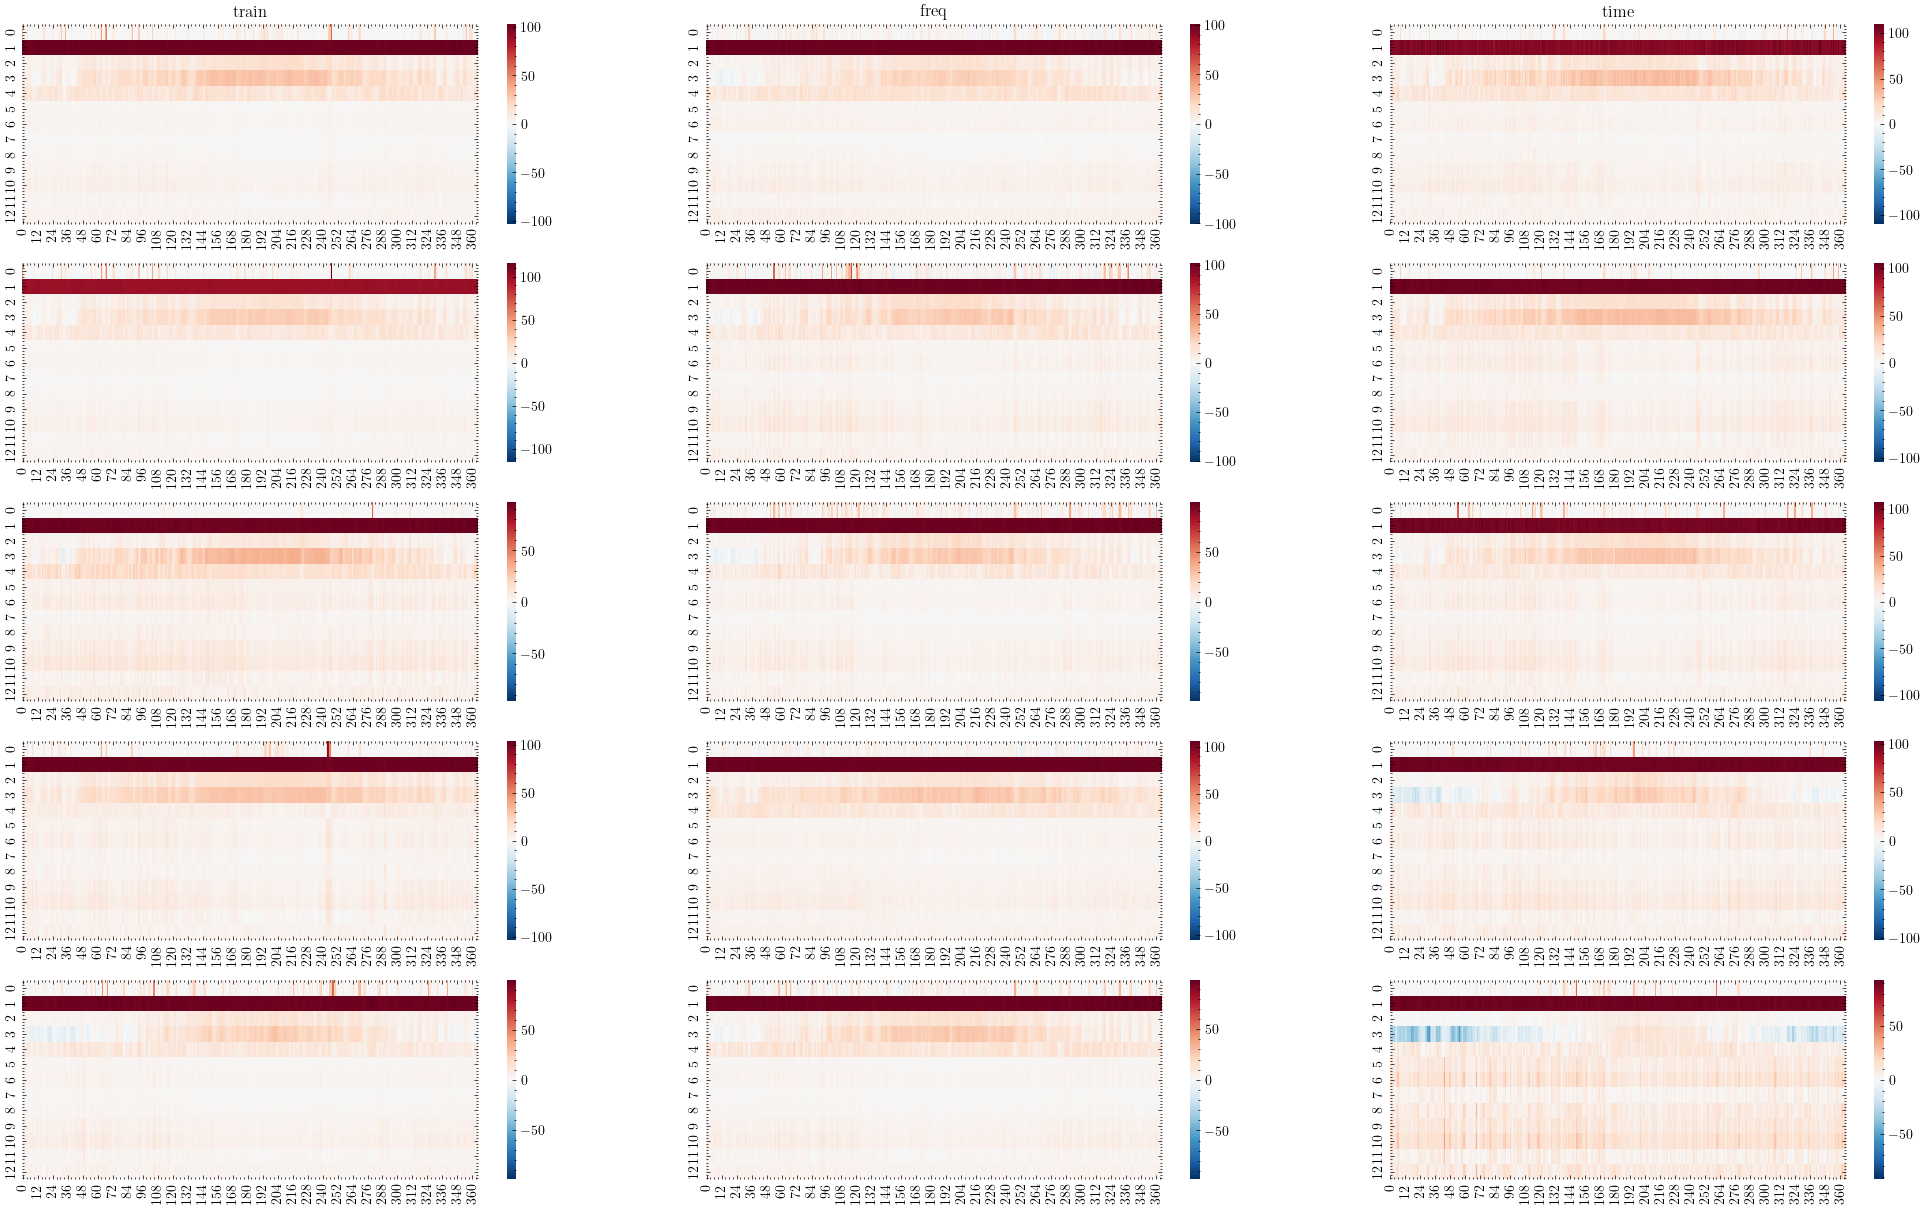

In [11]:
#drought
model_ids = {"freq": "j5l1t49d" , "time": "pkjeomys"}
samples_dic = {}

for domain, id in model_ids.items():
    path_samples = runs_dir / id / "samples.pt"
    
    samples_dic[domain] = torch.load(path_samples)
    #shuffle
    idx = np.random.permutation(samples_dic[domain].shape[0])
    samples_dic[domain] = samples_dic[domain][idx]
    

train_samples = get_train_samples(model_ids["freq"])
#Shuffle the train samples
idx = np.random.permutation(train_samples.shape[0])
train_samples = train_samples[idx]

samples_dic["train"] = train_samples
plot_samples(samples_dic, 5)
heatmap_samples(samples_dic, 5)